In [152]:
from langgraph.graph import StateGraph, START , END
from dotenv import load_dotenv
load_dotenv()
from typing import TypedDict,Optional, Annotated,List
from  langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from  langchain_core.prompts import PromptTemplate

In [153]:
class Subjects(TypedDict):
    subject : str
    hour : int
    text : str
    next_node : str

In [154]:
graph = StateGraph(Subjects)

In [155]:
llm = HuggingFaceEndpoint(model="meta-llama/Meta-Llama-3-8B-Instruct",task="text-generation")
model = ChatHuggingFace(llm=llm)

In [156]:
def write_notes(state:Subjects)->Subjects:
   prompt = PromptTemplate(template="""Write notes bout these : {text}""",
                        validate_template=True,input_variables=['text'])
   text = prompt.invoke({"text":state['subject']})
   result = model.invoke(
    text
   )
   if type(result.content)==str:
      state['text']=result.content
   return state

In [157]:
def get_brief(state:Subjects)->Subjects:
   state['subject']="Linear Algebra"
   state['hour']=12
   state['text']=''
   return state

In [158]:
def write_short_notes(state:Subjects)->Subjects:
   prompt = PromptTemplate(template="""Write short notes bout these : {text}""",
                        validate_template=True,input_variables=['text'])
   text = prompt.invoke({"text":state['subject']})
   result = model.invoke(
    text
   )
   if type(result.content)==str:
      state['text']=result.content
   return state

In [159]:
def write_imp_points(state:Subjects)->Subjects:
   prompt = PromptTemplate(template="""Write only important points about these : {text}""",
                        validate_template=True,input_variables=['text'])
   text = prompt.invoke({"text":state['subject']})
   result = model.invoke(
    text
   )
   if type(result.content)==str:
      state['text']=result.content
   return state

In [160]:
def give_literal(state: Subjects) -> Subjects:
    if state['hour'] > 2:
        state['next_node'] = 'write_notes'
    elif state['hour'] == 2:
        state['next_node'] = 'write_short_notes'
    else:
        state['next_node'] = 'write_imp_points'
    return state


In [161]:

graph.add_node('give_literal', give_literal)
graph.add_node('write_notes', write_notes)
graph.add_node('write_short_notes', write_short_notes)
graph.add_node('write_imp_points', write_imp_points)

graph.add_edge(START, 'give_literal')

# Conditional routing using next_node
graph.add_conditional_edges('give_literal', lambda state: state['next_node'])

# Normal edges to END
graph.add_edge('write_notes', END)
graph.add_edge('write_short_notes', END)
graph.add_edge('write_imp_points', END)


In [162]:
worflow = graph.compile()

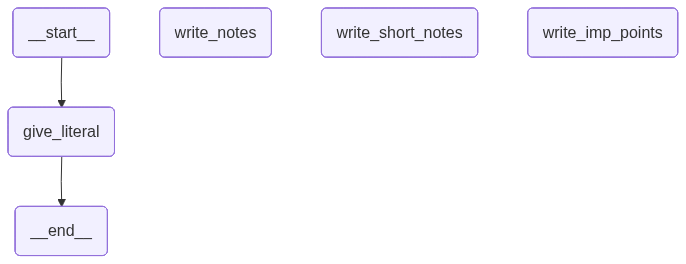

In [163]:
worflow

In [166]:
result = worflow.invoke({"subject": "English", "hour": 1,})

In [167]:
result

{'subject': 'English',
 'hour': 1,
 'text': 'Here are some key points about the English language:\n\n **Origin** : English originated from Germanic dialects brought to England by Germanic tribes in the 5th and 6th centuries.\n\n **Evolution** : English has evolved from Old English to Middle English and finally to Modern English through various influences like French, Latin, and Greek.\n\n **Language Family** : English belongs to the Indo-European language family, specifically the Germanic branch.\n\n **Pronunciation** : English pronunciation can be challenging due to its complex sound system, with over 40 distinct consonant and vowel sounds.\n\n **Vocabulary** : English vocabulary has been influenced by numerous other languages, with estimates suggesting that around 30% of English words have Latin or French origins.\n\n **Grammar** : English grammar is relatively flexible, with a simple sentence structure and limited use of cases.\n\n **Spelling** : English spelling is often irregular,